In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\sakon\anaconda3.1\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Read CSV and perform data cleaning

In [4]:
df = pd.read_csv("Unemployment_cuy_Franklin_Butler.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Cuy_Unpl,Franklin_Unpl,Butler_Unpl,Mean
0,9.3,9.9,11.2,10.13
1,9.7,9.7,11.0,10.13
2,9.0,9.6,10.8,9.80
3,8.5,9.1,10.2,9.27
4,8.4,8.7,9.7,8.93


# Select your features (columns)

In [5]:
# Set features. This is used as x values.
df.columns
selected_features = df[df.columns]
selected_features = selected_features.drop(columns = 'Mean')
X = selected_features
y = df['Mean'].to_numpy()
#y = df['Mean'].values.reshape(-1, 1)
y

array([10.13, 10.13,  9.8 ,  9.27,  8.93,  9.33,  9.33,  8.97,  8.67,
        8.47,  8.57,  8.17,  8.93,  8.73,  8.23,  7.77,  8.07,  8.9 ,
        8.8 ,  8.3 ,  8.07,  7.67,  7.1 ,  7.1 ,  7.77,  7.73,  7.27,
        6.57,  6.7 ,  7.4 ,  7.47,  6.9 ,  6.47,  6.37,  6.2 ,  6.63,
        7.9 ,  7.6 ,  6.97,  6.37,  6.77,  7.6 ,  7.4 ,  7.  ,  6.83,
        6.8 ,  6.27,  5.97,  6.77,  6.7 ,  6.1 ,  5.03,  5.4 ,  5.9 ,
        6.  ,  5.57,  5.07,  4.8 ,  4.7 ,  4.57,  5.47,  5.2 ,  4.8 ,
        4.4 ,  4.73,  5.03,  4.83,  4.27,  4.17,  4.13,  4.2 ,  4.2 ,
        4.87,  4.93,  4.8 ,  4.43,  4.23,  5.  ,  4.87,  4.8 ,  4.83,
        4.7 ,  4.4 ,  4.67,  5.5 ,  5.4 ,  4.77,  4.4 ,  4.5 ,  5.1 ,
        5.03,  5.  ,  4.5 ,  4.17,  4.07,  4.  ,  4.53,  4.63,  4.3 ,
        4.  ,  4.  ,  4.93,  4.57,  4.23,  3.97,  3.9 ,  3.7 ,  4.  ,
        4.5 ,  4.1 ,  3.87,  3.3 ,  3.5 ,  4.23,  4.37,  4.  ,  3.7 ,
        3.5 ,  3.37,  3.4 ,  4.4 ,  4.3 ,  5.2 , 17.  , 13.87, 11.87,
       10.13,  9.6 ]

In [6]:
selected_features

,Cuy_Unpl,Franklin_Unpl,Butler_Unpl
0,9.3,9.9,11.2
1,9.7,9.7,11.0
2,9.0,9.6,10.8
3,8.5,9.1,10.2
4,8.4,8.7,9.7
...,...,...,...
123,22.9,13.9,14.2
124,18.1,11.6,11.9
125,15.2,10.6,9.8
126,13.1,9.1,8.2


In [7]:
columns = selected_features.columns.to_list()

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [9]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: 10.13
Encoded Label: 83
------------
Original Class: 10.13
Encoded Label: 83
------------
Original Class: 9.8
Encoded Label: 82
------------
Original Class: 9.27
Encoded Label: 79
------------
Original Class: 8.93
Encoded Label: 77
------------
Original Class: 9.33
Encoded Label: 80
------------
Original Class: 9.33
Encoded Label: 80
------------
Original Class: 8.97
Encoded Label: 78
------------
Original Class: 8.67
Encoded Label: 73
------------
Original Class: 8.47
Encoded Label: 71
------------
Original Class: 8.57
Encoded Label: 72
------------
Original Class: 8.17
Encoded Label: 68
------------
Original Class: 8.93
Encoded Label: 77
------------
Original Class: 8.73
Encoded Label: 74
------------
Original Class: 8.23
Encoded Label: 69
------------
Original Class: 7.77
Encoded Label: 65
------------
Original Class: 8.07
Encoded Label: 67
------------
Original Class: 8.9
Encoded Label: 76
------------
Original Class: 8.8
Encoded Label: 75
------------
Original Clas

In [10]:
encoded_y

array([83, 83, 82, 79, 77, 80, 80, 78, 73, 71, 72, 68, 77, 74, 69, 65, 67,
       76, 75, 70, 67, 63, 58, 58, 65, 64, 59, 49, 51, 60, 61, 55, 48, 47,
       45, 50, 66, 62, 56, 47, 52, 62, 60, 57, 54, 53, 46, 42, 52, 51, 44,
       33, 37, 41, 43, 40, 34, 28, 25, 22, 38, 36, 28, 18, 26, 33, 29, 15,
       12, 11, 13, 13, 30, 31, 28, 19, 14, 32, 30, 28, 29, 25, 18, 24, 39,
       37, 27, 18, 20, 35, 33, 32, 20, 12,  9,  8, 21, 23, 16,  8,  8, 31,
       22, 14,  7,  6,  4,  8, 20, 10,  5,  0,  3, 14, 17,  8,  4,  3,  1,
        2, 18, 16, 36, 86, 85, 84, 83, 81], dtype=int64)

In [11]:
encoded_y = encoded_y.reshape(-1,1)

In [12]:
#from keras.utils import to_categorical
#one_hot_y = to_categorical(encoded_y)
#one_hot_y

In [13]:
print(X.shape, y.shape)

(128, 3) (128,)


In [14]:
encoded_y.shape

(128, 1)

# Create a Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, encoded_y_train, encoded_y_test = train_test_split(X, encoded_y, random_state=1)

In [16]:
X_train.head()

,Cuy_Unpl,Franklin_Unpl,Butler_Unpl
88,5.6,3.8,4.1
74,5.5,4.3,4.6
120,4.7,4.0,4.5
45,6.8,6.3,7.3
77,5.9,4.3,4.8


In [17]:
print(X_train.shape, encoded_y_train.shape)

(96, 3) (96, 1)


In [18]:
#encoded_y_train.shape(128,1)

# Pre-processing

In [19]:
#Scale the data using the MinMaxScaler and perform some feature selection

In [20]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit (encoded_y_train)

In [21]:
X_scaled_train = X_scaler.transform(X_train)
X_scaled_test = X_scaler.transform(X_test)
#y_scaled_train = y_scaler.transform(encoded_y_train)
#y_scaled_test = y_scaler.transform(encoded_y_test)

In [22]:
X_scaled_train

array([[0.10824742, 0.0733945 , 0.09009009],
       [0.10309278, 0.11926606, 0.13513514],
       [0.06185567, 0.09174312, 0.12612613],
       [0.17010309, 0.30275229, 0.37837838],
       [0.12371134, 0.11926606, 0.15315315],
       [0.03092784, 0.06422018, 0.07207207],
       [0.10824742, 0.08256881, 0.11711712],
       [0.08247423, 0.11009174, 0.15315315],
       [0.20103093, 0.34862385, 0.44144144],
       [0.10309278, 0.11009174, 0.15315315],
       [0.17010309, 0.13761468, 0.16216216],
       [0.22680412, 0.48623853, 0.57657658],
       [0.09793814, 0.11009174, 0.15315315],
       [0.1443299 , 0.27522936, 0.36036036],
       [0.49484536, 0.55963303, 0.45945946],
       [0.17010309, 0.32110092, 0.40540541],
       [0.21134021, 0.4587156 , 0.55855856],
       [0.41752577, 0.55963303, 0.45045045],
       [0.1443299 , 0.28440367, 0.37837838],
       [0.20618557, 0.40366972, 0.51351351],
       [0.1185567 , 0.12844037, 0.15315315],
       [0.13917526, 0.27522936, 0.34234234],
       [0.

In [23]:
encoded_y_train.ravel()

array([20, 28, 18, 53, 32,  6, 23, 25, 60, 29, 37, 72, 28, 48, 83, 56, 70,
       81, 49, 66, 32, 47, 31, 16, 33, 52, 33, 11, 12, 58, 45, 18,  3,  2,
       65, 62, 37, 59, 57, 65, 17, 30, 35, 51, 63, 13, 79,  8, 61, 85, 42,
        8, 73, 25, 38, 83,  3, 28, 58, 36, 18, 78, 86, 74, 27, 21,  9,  8,
       18, 12,  0, 69, 60, 51, 68, 39, 75, 31, 67, 44, 64, 80, 10, 13, 14,
       83, 67, 26, 28, 80, 19, 71, 30, 77,  8, 62], dtype=int64)

In [24]:
print(X_scaled_train.shape, encoded_y_train.shape)

(96, 3) (96, 1)


# Train the Model

In [25]:
encoded_y_train = encoded_y_train.ravel()

In [26]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_scaled_train, encoded_y_train.ravel())
lsvc = model.fit(X_scaled_train, encoded_y_train.ravel())

In [27]:
print(f"Training Data Score: {model.score(X_scaled_train, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_scaled_test, encoded_y_test)}")

Training Data Score: 0.15625
Testing Data Score: 0.03125


In [28]:
model.coef_[0]

array([ 0.01030928, -0.01834862, -0.02702703])

In [29]:
print(model.coef_, columns)


[[ 0.01030928 -0.01834862 -0.02702703]
 [-0.01030928 -0.01834862 -0.01801802]
 [-0.01546392 -0.06422018 -0.07207207]
 ...
 [-0.35049294 -0.20022294 -0.19982045]
 [-0.63484908 -0.39963186 -0.35386852]
 [-0.24742268 -0.21100917 -0.20720721]] ['Cuy_Unpl', 'Franklin_Unpl', 'Butler_Unpl']


In [30]:
def plot_coefficients(classifier, feature_names, top_features=40, class_num =1):

    coef = classifier.coef_[class_num].ravel()
    print("classifier.coef type",type(classifier.coef_))
    print("classifier.coef", classifier.coef_)
    print("type coef",type(coef))
    print("len(coeff)", len(coef))
    print("coef",coef)
    print("argsrt(coeff)",np.argsort(coef))
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    print(len(top_positive_coefficients))
    print(type(top_positive_coefficients))
    print(top_positive_coefficients)
    top_negative_coefficients = np.argsort(coef)[:top_features]
    print(top_negative_coefficients)
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    print(top_coefficients)
    print(np.array(feature_names))
    #print(np.array(feature_names)[top_coefficients])
    #x_labels = np.array(feature_names)[top_coefficients]
    
 # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    print("coef[top_coefficients]",coef[top_coefficients])
    #print(feature_names[top_coefficients])
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    print("feature names",feature_names)
    print("top coefficients", top_coefficients)
    print("feature_name_top", feature_names[top_coefficients])
    features = feature_names[top_coefficients]
    plt.xticks(np.arange(1, 1 + 2 * top_features), features, rotation=60, ha='right')
    plt.show()

In [31]:
df_coef_1 = model.coef_[0]

In [32]:
cv = CountVectorizer()
cv.fit(selected_features)
print (len(cv.vocabulary_))
print(len(cv.get_feature_names()))
print (cv.get_feature_names())

3
3
['butler_unpl', 'cuy_unpl', 'franklin_unpl']


classifier.coef type <class 'numpy.ndarray'>
classifier.coef [[ 0.01030928 -0.01834862 -0.02702703]
 [-0.01030928 -0.01834862 -0.01801802]
 [-0.01546392 -0.06422018 -0.07207207]
 ...
 [-0.35049294 -0.20022294 -0.19982045]
 [-0.63484908 -0.39963186 -0.35386852]
 [-0.24742268 -0.21100917 -0.20720721]]
type coef <class 'numpy.ndarray'>
len(coeff) 3
coef [ 0.01030928 -0.01834862 -0.02702703]
argsrt(coeff) [2 1 0]
3
<class 'numpy.ndarray'>
[2 1 0]
[2 1 0]
[2 1 0 2 1 0]
['butler_unpl' 'cuy_unpl' 'franklin_unpl']
coef[top_coefficients] [-0.02702703 -0.01834862  0.01030928 -0.02702703 -0.01834862  0.01030928]
feature names ['butler_unpl' 'cuy_unpl' 'franklin_unpl']
top coefficients [2 1 0 2 1 0]
feature_name_top ['franklin_unpl' 'cuy_unpl' 'butler_unpl' 'franklin_unpl' 'cuy_unpl'
 'butler_unpl']


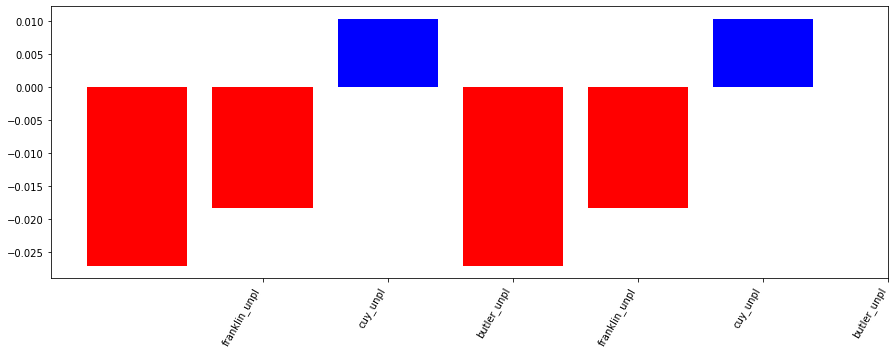

In [33]:
plot_coefficients(model, cv.get_feature_names(), 3,0)

classifier.coef type <class 'numpy.ndarray'>
classifier.coef [[ 0.01030928 -0.01834862 -0.02702703]
 [-0.01030928 -0.01834862 -0.01801802]
 [-0.01546392 -0.06422018 -0.07207207]
 ...
 [-0.35049294 -0.20022294 -0.19982045]
 [-0.63484908 -0.39963186 -0.35386852]
 [-0.24742268 -0.21100917 -0.20720721]]
type coef <class 'numpy.ndarray'>
len(coeff) 3
coef [-0.01030928 -0.01834862 -0.01801802]
argsrt(coeff) [1 2 0]
3
<class 'numpy.ndarray'>
[1 2 0]
[1 2 0]
[1 2 0 1 2 0]
['butler_unpl' 'cuy_unpl' 'franklin_unpl']
coef[top_coefficients] [-0.01834862 -0.01801802 -0.01030928 -0.01834862 -0.01801802 -0.01030928]
feature names ['butler_unpl' 'cuy_unpl' 'franklin_unpl']
top coefficients [1 2 0 1 2 0]
feature_name_top ['cuy_unpl' 'franklin_unpl' 'butler_unpl' 'cuy_unpl' 'franklin_unpl'
 'butler_unpl']


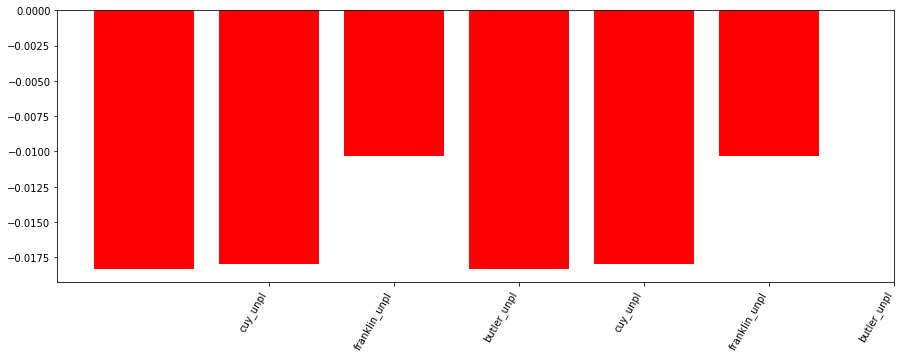

In [34]:
plot_coefficients(model, cv.get_feature_names(), 3, 1)

classifier.coef type <class 'numpy.ndarray'>
classifier.coef [[ 0.01030928 -0.01834862 -0.02702703]
 [-0.01030928 -0.01834862 -0.01801802]
 [-0.01546392 -0.06422018 -0.07207207]
 ...
 [-0.35049294 -0.20022294 -0.19982045]
 [-0.63484908 -0.39963186 -0.35386852]
 [-0.24742268 -0.21100917 -0.20720721]]
type coef <class 'numpy.ndarray'>
len(coeff) 3
coef [-0.01546392 -0.06422018 -0.07207207]
argsrt(coeff) [2 1 0]
3
<class 'numpy.ndarray'>
[2 1 0]
[2 1 0]
[2 1 0 2 1 0]
['butler_unpl' 'cuy_unpl' 'franklin_unpl']
coef[top_coefficients] [-0.07207207 -0.06422018 -0.01546392 -0.07207207 -0.06422018 -0.01546392]
feature names ['butler_unpl' 'cuy_unpl' 'franklin_unpl']
top coefficients [2 1 0 2 1 0]
feature_name_top ['franklin_unpl' 'cuy_unpl' 'butler_unpl' 'franklin_unpl' 'cuy_unpl'
 'butler_unpl']


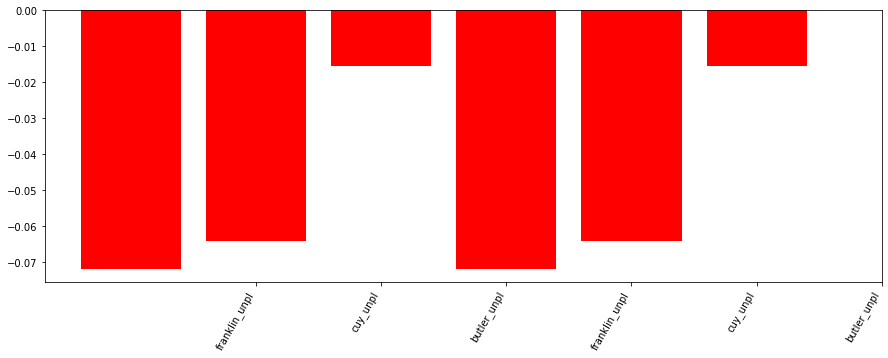

In [35]:
plot_coefficients(model, cv.get_feature_names(), 3, 2)

In [36]:
def f_importances(coef, names):
    imp = coef
    print(imp)
    print(names)
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [37]:
df_coef_0 = pd.DataFrame({'coef' : model.coef_[0],'abs(coef_)': abs(model.coef_[0]), 'name': columns})
df_coef_0=df_coef_0.sort_values('abs(coef_)', ascending = False)[-20:].reset_index()
df_coef_0

,index,coef,abs(coef_),name
0,2,-0.027027,0.027027,Butler_Unpl
1,1,-0.018349,0.018349,Franklin_Unpl
2,0,0.010309,0.010309,Cuy_Unpl


In [38]:
df_coef_1 = pd.DataFrame({'coef' : model.coef_[1],'abs(coef_)': abs(model.coef_[1]), 'name': columns})
df_coef_1=df_coef_1.sort_values('abs(coef_)', ascending = False)[-20:].reset_index()
df_coef_1

,index,coef,abs(coef_),name
0,1,-0.018349,0.018349,Franklin_Unpl
1,2,-0.018018,0.018018,Butler_Unpl
2,0,-0.010309,0.010309,Cuy_Unpl


In [39]:
df_coef_2 = pd.DataFrame({'coef' : model.coef_[2],'abs(coef_)': abs(model.coef_[2]), 'name': columns})
df_coef_2=df_coef_2.sort_values('abs(coef_)', ascending = False)[-20:].reset_index()
df_coef_2

,index,coef,abs(coef_),name
0,2,-0.072072,0.072072,Butler_Unpl
1,1,-0.064220,0.064220,Franklin_Unpl
2,0,-0.015464,0.015464,Cuy_Unpl


In [40]:
#out of the bottom 20 coefficients in each of the 3 classes these below are the ones common to all three.
df_least_important = df_coef_0.merge(df_coef_1, on = 'name', how = 'inner').merge(df_coef_2, on = 'name', how = 'inner')

In [41]:
least_important_list = df_least_important['name'].to_list()
least_important_list

['Butler_Unpl', 'Franklin_Unpl', 'Cuy_Unpl']

[ 0.01030928 -0.01834862 -0.02702703]
['Cuy_Unpl', 'Franklin_Unpl', 'Butler_Unpl']


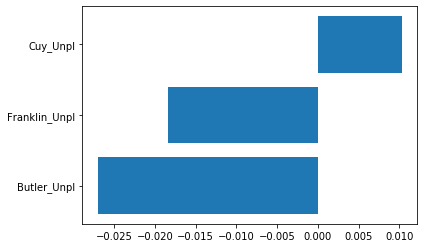

In [42]:
f_importances(model.coef_[0], columns)

In [43]:
len(columns)

3

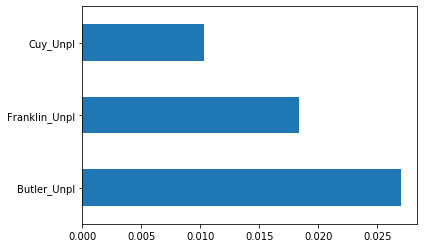

In [44]:
pd.Series(abs(model.coef_[0]), index=columns).nlargest(30).plot(kind='barh')

In [45]:
from sklearn.feature_selection import SelectFromModel
model1 = SelectFromModel(lsvc, prefit=True)
X_new = model1.transform(X)
X_new

array([[ 9.9, 11.2],
       [ 9.7, 11. ],
       [ 9.6, 10.8],
       [ 9.1, 10.2],
       [ 8.7,  9.7],
       [ 9. , 10.1],
       [ 9. , 10.1],
       [ 8.7,  9.8],
       [ 8.4,  9.5],
       [ 8.3,  9.4],
       [ 8.3,  9.5],
       [ 7.9,  9.1],
       [ 8.6, 10. ],
       [ 8.2,  9.6],
       [ 7.9,  9.2],
       [ 7.5,  8.7],
       [ 7.7,  9. ],
       [ 8.4,  9.8],
       [ 8.4,  9.8],
       [ 8. ,  9.3],
       [ 7.7,  9. ],
       [ 7.3,  8.6],
       [ 6.7,  8. ],
       [ 6.6,  8. ],
       [ 7.3,  8.7],
       [ 7.1,  8.4],
       [ 6.7,  8.1],
       [ 6.1,  7.3],
       [ 6.1,  7.3],
       [ 6.7,  8. ],
       [ 6.8,  8.2],
       [ 6.4,  7.5],
       [ 6. ,  7.1],
       [ 5.9,  7. ],
       [ 5.8,  6.9],
       [ 6.1,  7.4],
       [ 7.4,  8.8],
       [ 6.9,  8.1],
       [ 6.5,  7.6],
       [ 6. ,  6.9],
       [ 6.3,  7.2],
       [ 7. ,  8.1],
       [ 6.8,  8. ],
       [ 6.5,  7.5],
       [ 6.5,  7.3],
       [ 6.3,  7.3],
       [ 5.8,  6.7],
       [ 5.3,

# Hyperparameter Tuning

In [46]:
# Use GridSearchCV to tune the model's parameters

In [47]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [3,30, 31, 20,10, 11, 12, 13],
              'gamma': [1e-16, 1e-15,1e-14,1e-13]}
grid = GridSearchCV (model, param_grid, n_jobs = 5, verbose=3)

In [48]:
# Train the model with GridSearch
grid.fit(X_scaled_train, encoded_y_train.ravel())

Fitting 5 folds for each of 32 candidates, totalling 160 fits


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
grid

In [ ]:
sorted(grid.cv_results_.keys())

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

In [ ]:
df_results = pd.DataFrame({'col_1' : model.predict(X_scaled_test), 'col_2' : encoded_y_test.ravel()})
df_results

In [ ]:
search.cv_results_['params']

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'nakouma_svc.sav'
joblib.dump(model, filename)

In [ ]:
search.cv_results_['params']